<a href="https://colab.research.google.com/github/v-i-s-h-a-l-l/PT-1/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
img = cv2.imread('/content/images (15).jpeg')
img.shape

(194, 259, 3)

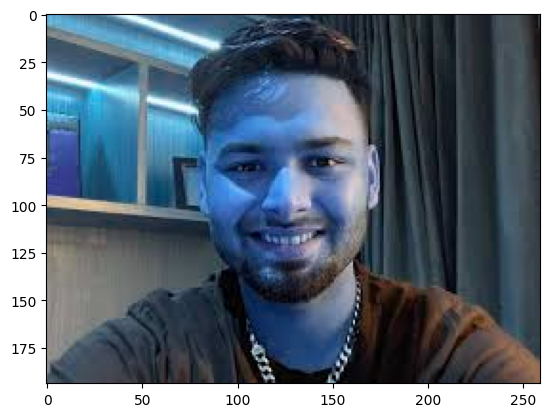

In [6]:
plt.imshow(img)

In [7]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(194, 259)

array([[161, 165, 174, ...,  27,  24,  73],
       [166, 170, 180, ...,  23,  20,  68],
       [175, 179, 189, ...,  21,  17,  63],
       ...,
       [106,  88,  93, ..., 105, 105, 105],
       [ 92,  96,  99, ..., 101, 101, 102],
       [ 92,  96,  99, ..., 101, 101, 102]], dtype=uint8)
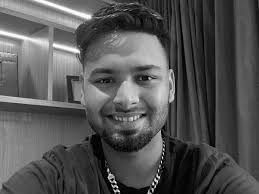

In [8]:
gray

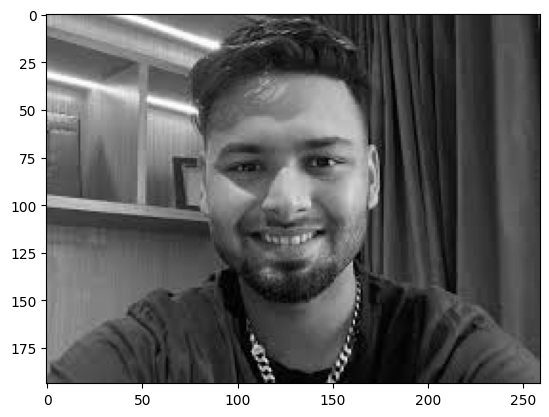

In [9]:
plt.imshow(gray, cmap='gray')

In [10]:
from zipfile import ZipFile
file_name = "/content/haarcascades.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

FileNotFoundError: [Errno 2] No such file or directory: '/content/haarcascades.zip'

In [74]:
from zipfile import ZipFile
file_name = "/content/New folder.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [11]:
face_cascade = cv2.CascadeClassifier('/content/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/content/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 70,  35, 114, 114]], dtype=int32)

In [12]:
(x,y,w,h) = faces[0]
x,y,w,h

(70, 35, 114, 114)

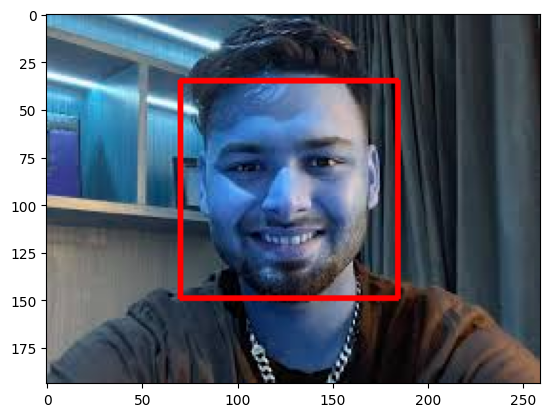

In [13]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

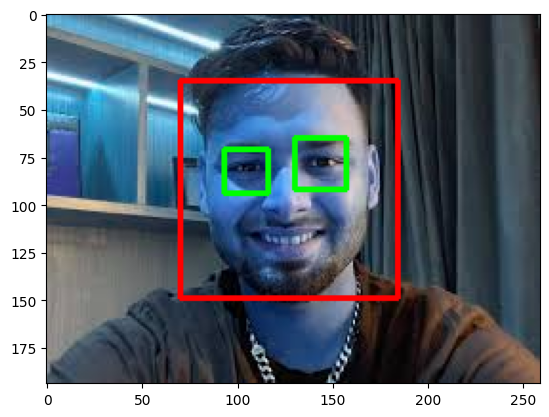

In [14]:
# Remove or comment out cv2.destroyAllWindows() as it's not needed in Colab
# cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)


plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

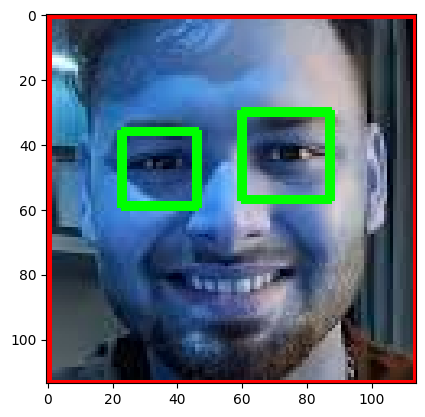

In [15]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [16]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

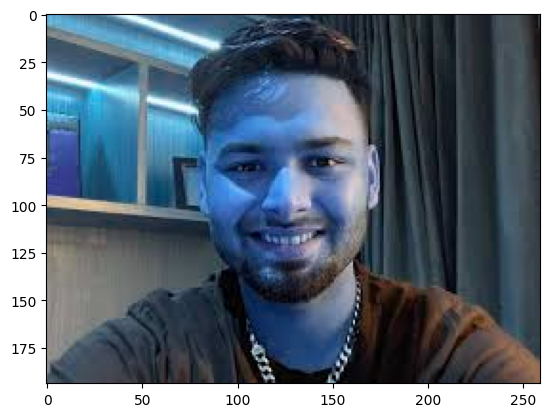

In [17]:
original_image = cv2.imread('/content/images (15).jpeg')
plt.imshow(original_image)

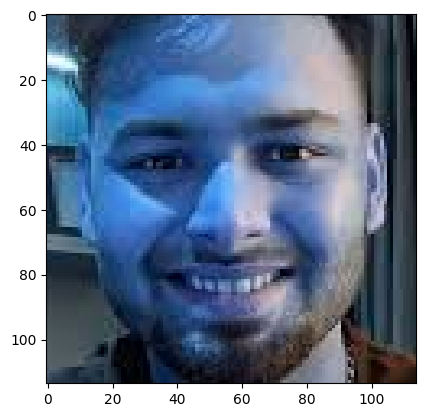

In [18]:
cropped_image = get_cropped_image_if_2_eyes('/content/images (15).jpeg')
plt.imshow(cropped_image)

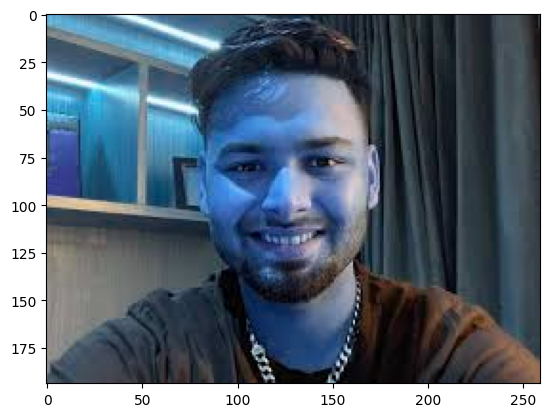

In [19]:
org_image_obstructed = cv2.imread('/content/images (15).jpeg')
plt.imshow(org_image_obstructed)

array([[[ 53,  83, 108],
        [ 53,  83, 108],
        [ 55,  83, 107],
        ...,
        [  0,   0,   8],
        [ 12,  15,  23],
        [ 78,  86,  93]],

       [[ 55,  84, 111],
        [ 55,  85, 110],
        [ 61,  89, 113],
        ...,
        [  0,   1,   9],
        [  4,   7,  15],
        [ 74,  82,  89]],

       [[ 57,  85, 115],
        [ 56,  85, 112],
        [ 53,  80, 106],
        ...,
        [  0,   2,  10],
        [  0,   1,   9],
        [ 68,  76,  83]],

       ...,

       [[ 74,  89, 105],
        [ 60,  75,  91],
        [ 56,  71,  87],
        ...,
        [ 43,  29,  17],
        [ 37,  24,  16],
        [ 32,  21,  13]],

       [[ 63,  78,  94],
        [ 59,  74,  90],
        [ 45,  60,  76],
        ...,
        [ 39,  24,  15],
        [ 34,  21,  13],
        [ 30,  19,  11]],

       [[ 64,  79,  95],
        [ 48,  63,  79],
        [ 41,  56,  72],
        ...,
        [ 34,  19,  10],
        [ 30,  17,   9],
        [ 27,  16,   8]]], dtype=uint8)
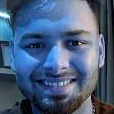

In [20]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('/content/images (15).jpeg')
cropped_image_no_2_eyes

In [76]:
path_to_data = "/content/New folder"
path_to_cr_data = "./New folder/cropped/"

In [77]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [78]:
img_dirs

['/content/New folder/rabada',
 '/content/New folder/arshadeep',
 '/content/New folder/pant']

In [79]:

import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [80]:
import os
import cv2

cropped_image_dirs = []
celebrity_file_names_dict = {}

# Assuming img_dirs contains all the directories you want to process (make sure it has all 6 directories)
# You can manually populate img_dirs or ensure it's populated correctly with all the folder paths.
img_dirs = ['/content/images of players/arshadeep', '/content/images of players/buttler', '/content/images of players/pant', '/content/images of players/shreyas', '/content/images of players/rabada', '/content/images of players/starc']  # Example

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]  # This extracts the folder name as the celebrity's name
    print(f"Processing celebrity: {celebrity_name}")

    celebrity_file_names_dict[celebrity_name] = []  # Initialize list for this celebrity

    # Check if the directory exists and has files
    if not os.path.exists(img_dir):
        print(f"Directory {img_dir} does not exist. Skipping.")
        continue  # Skip if the folder doesn't exist

    # Iterate over the files in the current directory
    for entry in os.scandir(img_dir):
        if entry.is_file():  # Ensure we're processing files, not directories
            # Assuming `get_cropped_image_if_2_eyes` is a function that processes the image
            roi_color = get_cropped_image_if_2_eyes(entry.path)

            if roi_color is not None:
                cropped_folder = os.path.join(path_to_cr_data, celebrity_name)  # Ensure correct path
                if not os.path.exists(cropped_folder):
                    os.makedirs(cropped_folder)
                    cropped_image_dirs.append(cropped_folder)
                    print(f"Generating cropped images in folder: {cropped_folder}")

                # Generate a unique file name for each cropped image
                cropped_file_name = f"{celebrity_name}{count}.png"
                cropped_file_path = os.path.join(cropped_folder, cropped_file_name)

                # Save the cropped image
                cv2.imwrite(cropped_file_path, roi_color)

                # Append the file path to the dictionary for this celebrity
                celebrity_file_names_dict[celebrity_name].append(cropped_file_path)

                count += 1


Processing celebrity: arshadeep
Generating cropped images in folder: ./New folder/cropped/arshadeep
Processing celebrity: buttler
Processing celebrity: pant
Generating cropped images in folder: ./New folder/cropped/pant
Processing celebrity: shreyas
Processing celebrity: rabada
Generating cropped images in folder: ./New folder/cropped/rabada
Processing celebrity: starc


In [81]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [82]:
img = cv2.imread('/content/images (15).jpeg')
img.shape

(194, 259, 3)

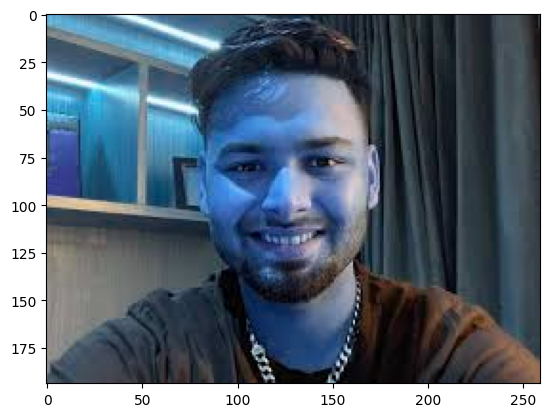

In [83]:
plt.imshow(img)

In [84]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(194, 259)

array([[161, 165, 174, ...,  27,  24,  73],
       [166, 170, 180, ...,  23,  20,  68],
       [175, 179, 189, ...,  21,  17,  63],
       ...,
       [106,  88,  93, ..., 105, 105, 105],
       [ 92,  96,  99, ..., 101, 101, 102],
       [ 92,  96,  99, ..., 101, 101, 102]], dtype=uint8)
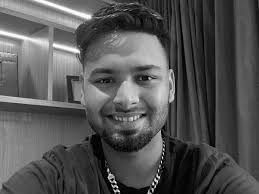

In [85]:
gray

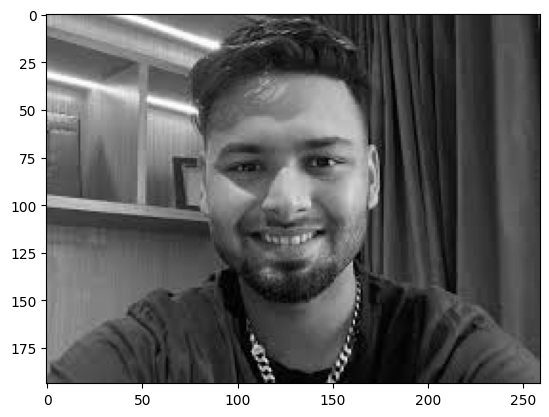

In [86]:
plt.imshow(gray, cmap='gray')

In [87]:
face_cascade = cv2.CascadeClassifier('/content/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/content/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 70,  35, 114, 114]], dtype=int32)

In [88]:
(x,y,w,h) = faces[0]
x,y,w,h

(70, 35, 114, 114)

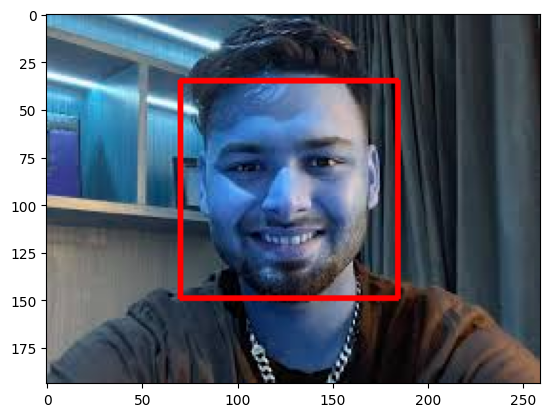

In [89]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

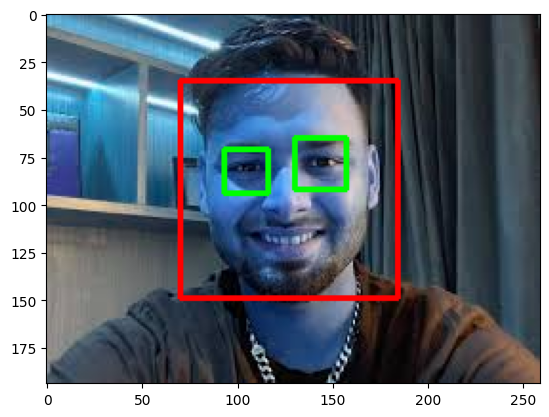

In [90]:
!pip install opencv-python-headless

import cv2
import matplotlib.pyplot as plt
# ... (rest of your code) ...

# Instead of using cv2.destroyAllWindows(), which relies on GUI support,
# you can switch to using matplotlib.pyplot's close method to close the
# figures displayed using plt.imshow().

# Example:
plt.close('all')  # This will close all matplotlib figures.

# ... (rest of your code) ...












for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)


plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

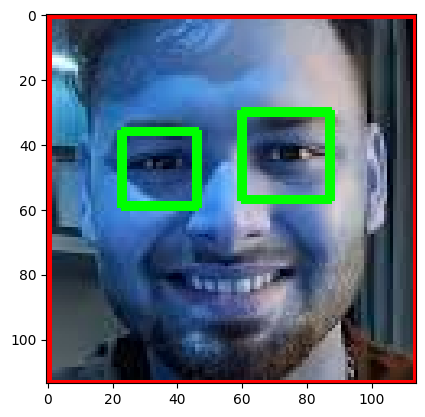

In [91]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [92]:
cropped_img = np.array(roi_color)
cropped_img.shape

(114, 114, 3)

In [93]:
!pip install PyWavelets # Installs the PyWavelets package, which includes pywt
import numpy as np
import pywt # Now you can import pywt after installing the package
import cv2

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)
    imArray /= 255;
    # compute coefficients
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)
    coeffs_H[0] *= 0;

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

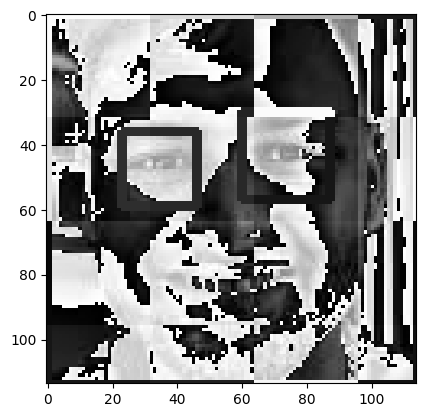

In [94]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [95]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

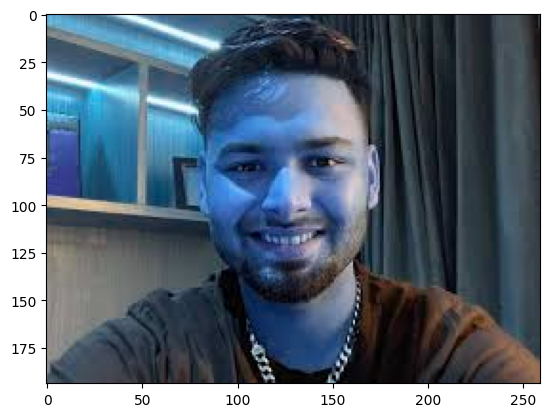

In [96]:
original_image = cv2.imread('/content/images (15).jpeg')
plt.imshow(original_image)

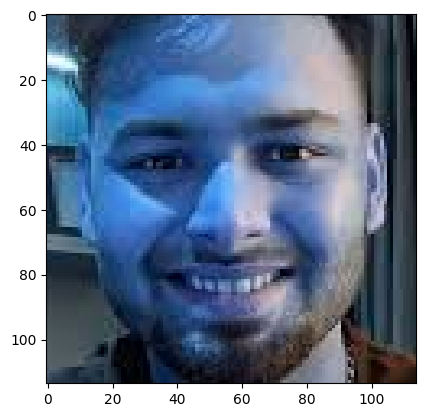

In [97]:
cropped_image = get_cropped_image_if_2_eyes('/content/images (15).jpeg')
plt.imshow(cropped_image)

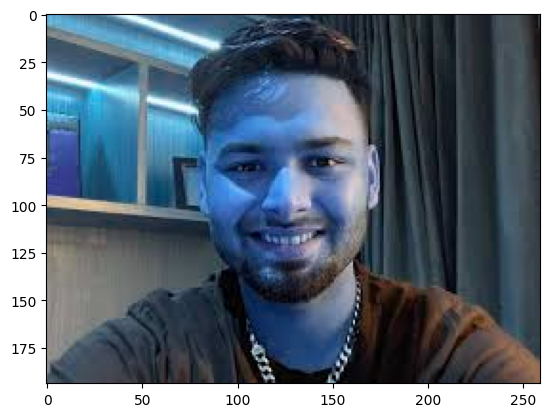

In [98]:
org_image_obstructed = cv2.imread('/content/images (15).jpeg')
plt.imshow(org_image_obstructed)

array([[[ 53,  83, 108],
        [ 53,  83, 108],
        [ 55,  83, 107],
        ...,
        [  0,   0,   8],
        [ 12,  15,  23],
        [ 78,  86,  93]],

       [[ 55,  84, 111],
        [ 55,  85, 110],
        [ 61,  89, 113],
        ...,
        [  0,   1,   9],
        [  4,   7,  15],
        [ 74,  82,  89]],

       [[ 57,  85, 115],
        [ 56,  85, 112],
        [ 53,  80, 106],
        ...,
        [  0,   2,  10],
        [  0,   1,   9],
        [ 68,  76,  83]],

       ...,

       [[ 74,  89, 105],
        [ 60,  75,  91],
        [ 56,  71,  87],
        ...,
        [ 43,  29,  17],
        [ 37,  24,  16],
        [ 32,  21,  13]],

       [[ 63,  78,  94],
        [ 59,  74,  90],
        [ 45,  60,  76],
        ...,
        [ 39,  24,  15],
        [ 34,  21,  13],
        [ 30,  19,  11]],

       [[ 64,  79,  95],
        [ 48,  63,  79],
        [ 41,  56,  72],
        ...,
        [ 34,  19,  10],
        [ 30,  17,   9],
        [ 27,  16,   8]]], dtype=uint8)
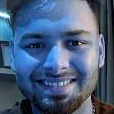

In [99]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('/content/images (15).jpeg')
cropped_image_no_2_eyes

In [101]:
path_to_data = "/content/New folder"
path_to_cr_data = "/content/New folder/cropped"

In [102]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [103]:
img_dirs

['/content/New folder/cropped',
 '/content/New folder/rabada',
 '/content/New folder/arshadeep',
 '/content/New folder/pant']

In [104]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [105]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  /content/New folder/croppedrabada
Generating cropped images in folder:  /content/New folder/croppedarshadeep
Generating cropped images in folder:  /content/New folder/croppedpant


In [106]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'croppedrabada': ['/content/New folder/croppedrabada/rabada1.png'],
 'croppedarshadeep': ['/content/New folder/croppedarshadeep/arshadeep1.png'],
 'croppedpant': ['/content/New folder/croppedpant/pant1.png',
  '/content/New folder/croppedpant/pant4.png',
  '/content/New folder/croppedpant/pant3.png',
  '/content/New folder/croppedpant/pant2.png']}

In [107]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'croppedrabada': 0, 'croppedarshadeep': 1, 'croppedpant': 2}

In [108]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [109]:
len(X[0])

4096

In [110]:
32*32*3 + 32*32

4096

In [111]:
X[0]

array([[18],
       [27],
       [46],
       ...,
       [ 0],
       [ 0],
       [ 0]], dtype=uint8)

In [112]:
y[0]

0

In [113]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(6, 4096)

In [114]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

1.0

In [116]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [117]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [118]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [120]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    # Change cv to a value less than or equal to the number of samples in y_train, for example, 2
    clf =  GridSearchCV(pipe, mp['params'], cv=2, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and

,model,best_score,best_params
0,svm,0.25,"{'svc__C': 1, 'svc__kernel': 'rbf'}"
1,random_forest,0.50,{'randomforestclassifier__n_estimators': 1}
2,logistic_regression,0.25,{'logisticregression__C': 1}


In [122]:
best_estimators['svm'].score(X_test,y_test)

1.0

In [123]:
best_estimators['random_forest'].score(X_test,y_test)

1.0

In [124]:
best_estimators['logistic_regression'].score(X_test,y_test)

1.0

In [126]:
best_clf = best_estimators['svm']

In [127]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


array([[2]])

Text(95.72222222222221, 0.5, 'Truth')

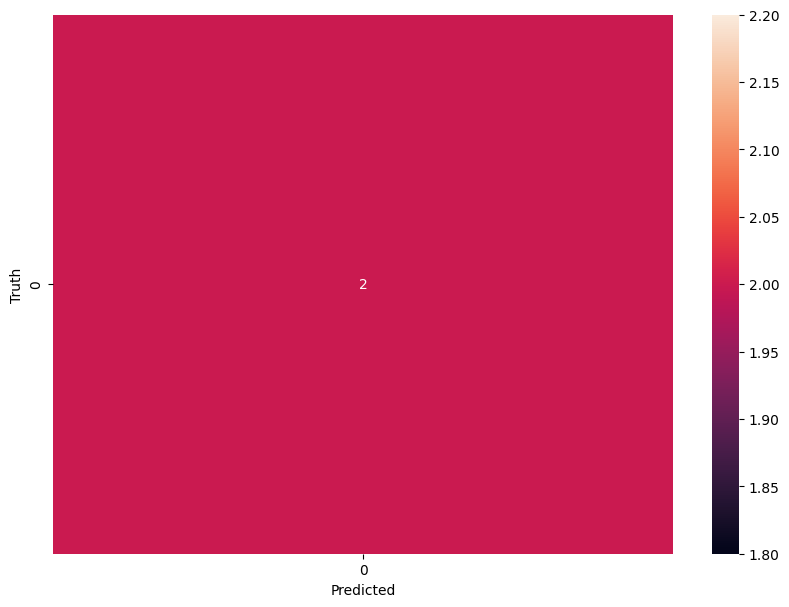

In [128]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [129]:
class_dict

{'croppedrabada': 0, 'croppedarshadeep': 1, 'croppedpant': 2}

In [130]:
!pip install joblib
import joblib
# Save the model as a pickle in a file
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [131]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))